In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("ccd.csv")

In [3]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282350,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,"CITIBANK, N.A.",MO,63301,NaN,NaN,Web,12/02/2011,Closed with relief,Yes,No,2396
1282351,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,NaN,NaN,Web,12/06/2011,Closed without relief,No,No,2323
1282352,12/01/2011,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,43207,NaN,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2126
1282353,12/01/2011,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,80920,NaN,NaN,Web,12/01/2011,Closed with relief,Yes,No,2315


In [4]:
df.shape

(1282355, 18)

In [5]:
df.describe()

,Complaint ID
count,1.282355e+06
mean,1.929831e+06
std,9.645326e+05
min,1.000000e+00
25%,1.124152e+06
50%,2.123218e+06
75%,2.798886e+06
max,3.238682e+06


In [6]:
list(df.columns)

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

### Missing Values

In [7]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235166
Issue                                 0
Sub-issue                        531186
Consumer complaint narrative     898791
Company public response          833273
Company                               0
State                             19400
ZIP code                         115298
Tags                            1106712
Consumer consent provided?       591701
Submitted via                         0
Date sent to company                  0
Company response to consumer          7
Timely response?                      0
Consumer disputed?               513854
Complaint ID                          0
dtype: int64

<AxesSubplot:>

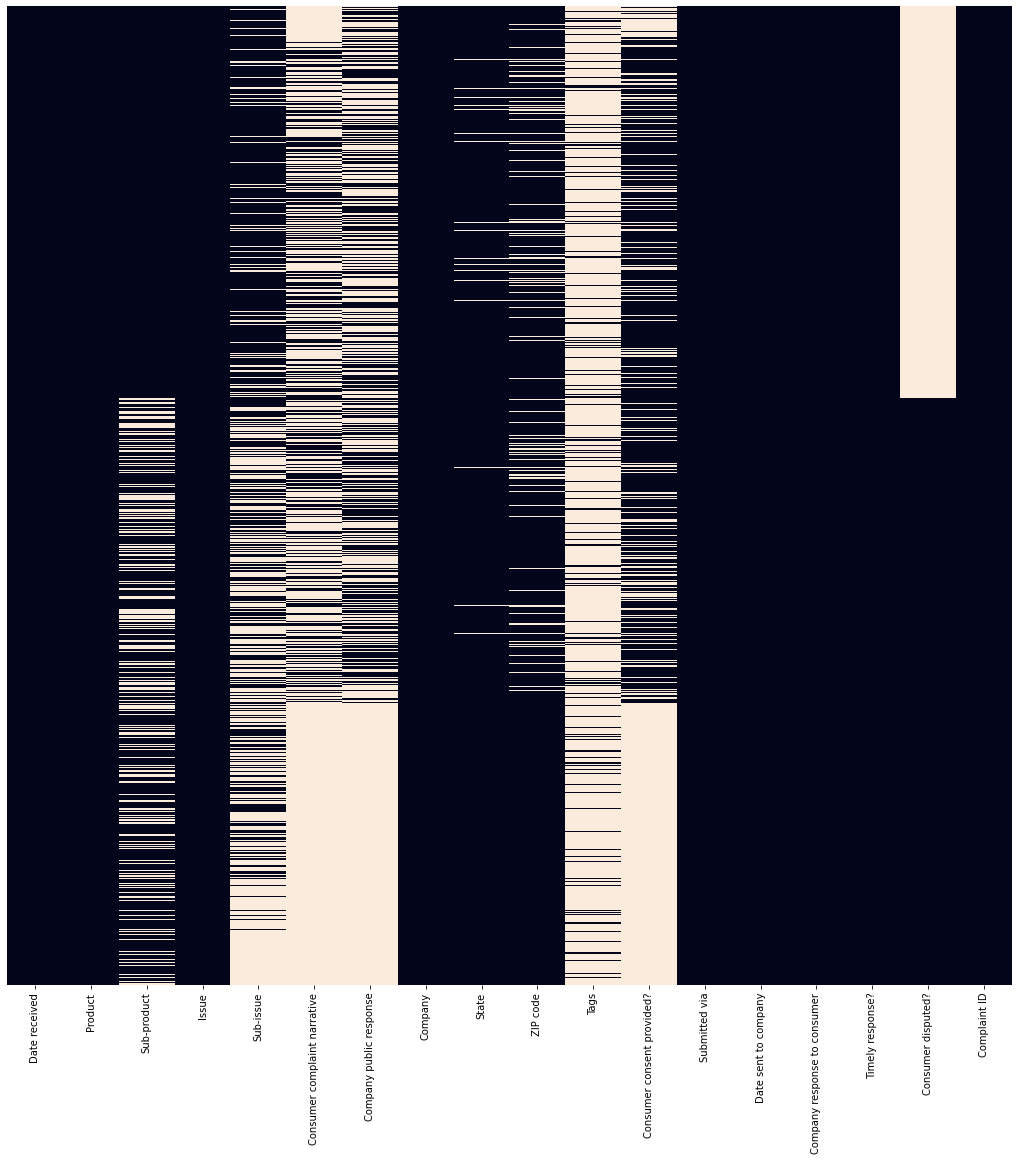

In [8]:
plt.figure(figsize=(18,18))
sns.heatmap(df.isnull(), cbar=False,yticklabels=False)

In [9]:
list(df["Product"].unique())

['Checking or savings account',
 'Debt collection',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Mortgage',
 'Student loan',
 'Vehicle loan or lease',
 'Credit card or prepaid card',
 'Payday loan, title loan, or personal loan',
 'Money transfer, virtual currency, or money service',
 'Credit reporting',
 'Credit card',
 'Bank account or service',
 'Consumer Loan',
 'Prepaid card',
 'Other financial service',
 'Payday loan',
 'Money transfers',
 'Virtual currency']

#### The dataset contains features that are not necessary to solve our multi-classification problem. For this text classification problem, we are going to build another dataframe that contains ‘Product’ and ‘Consumer complaint narrative’ (renamed as 'Consumer_complaint').

In [10]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()


In [11]:
# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

In [12]:
# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(383564, 2)

In [13]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

29.9

#### There are about 380,000 cases containing text out of more than 1 million complaints (about 30% of the original dataset is not null). Still, working with this number is a smart idea. Let's now have a look at the categories into which we want to divide up each complaint.

In [14]:
pd.DataFrame(df.Product.unique()).values

array([['Checking or savings account'],
       ['Debt collection'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Mortgage'],
       ['Student loan'],
       ['Vehicle loan or lease'],
       ['Credit card or prepaid card'],
       ['Payday loan, title loan, or personal loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Credit reporting'],
       ['Credit card'],
       ['Bank account or service'],
       ['Consumer Loan'],
       ['Prepaid card'],
       ['Other financial service'],
       ['Payday loan'],
       ['Money transfers'],
       ['Virtual currency']], dtype=object)

#### There are 18 different classes or categories (target). However; it is observed that some classes are contained in others.
#### so we will reduce these categories  and merge relevant categories in one 

In [15]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [16]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [17]:
pd.DataFrame(df2.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,Consumer Loan
3,Credit card or prepaid card
4,Mortgage
5,Vehicle loan or lease
6,Student loan
7,"Payday loan, title loan, or personal loan"
8,Checking or savings account
9,Bank account or service


#### Now we need to represent each class as a number, so as our predictive model can better understand the different categories.

In [18]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
310399,"Credit reporting, repair, or other",Bayview completely ignored laws and is reporti...,0
186155,"Credit reporting, repair, or other",inaccurate information no knowledge of account...,0
651135,Debt collection,On XXXX/XXXX/2016 I received a notice from Con...,1
515233,Consumer Loan,I have a loan with Kia Motor Finance. I rece...,2
641112,Credit card or prepaid card,I have a XXXX BIG card and made my payment whe...,3


##### pandas.factorize() method helps to get the numeric representation of an array by identifying distinct values
##### like it converts a,b,c,d into 1,2,3,4 .like for a,b,c,a it gives 1,2,3,1 means it gives new number to new alphabet

# EDA (Exploratory Data Analysis)

In [19]:
df2.groupby('Product').Consumer_complaint.count().sort_values()

Product
Other financial service                                  9
Money transfers                                         42
Money transfer, virtual currency, or money service     142
Vehicle loan or lease                                  164
Payday loan, title loan, or personal loan              166
Consumer Loan                                          271
Bank account or service                                354
Checking or savings account                            367
Student loan                                           569
Credit card or prepaid card                           1133
Mortgage                                              1352
Debt collection                                       2259
Credit reporting, repair, or other                    3172
Name: Consumer_complaint, dtype: int64

#### we will see No.of complaints in each product category in form of bar

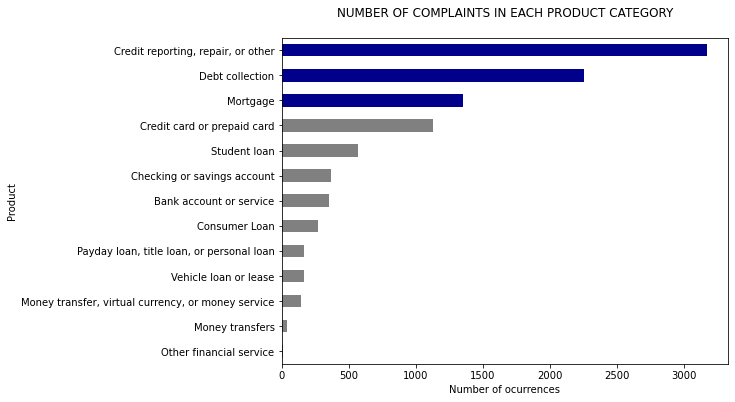

In [20]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh( color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

## Text Preprocessing

#### The text needs to be transformed to vectors so as the algorithms will be able make predictions.

###### Term frequency is defined as the number of times a word (i) appears in a document (j) divided by the total number of words in the document.



##### Inverse document frequency refers to the log of the total number of documents divided by the number of documents that contain the word. The logarithm is added to dampen the importance of a very high value of IDF.

TfidfVectorizer class can be initialized with the following parameters:

min_df: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.(we set value of min and max df,byt default its 1.0 and 0.01)


max_df: remove the words from the vocabulary which have occurred in more than _‘maxdf’ * total number of files in corpus.


sublinear_tf: set to True to scale the term frequency in logarithmic scale.


stop_words: remove the predefined stop words in 'english'.


use_idf: weight factor must use inverse document frequency.


ngram_range: (1, 2) to indicate that unigrams and bigrams will be considered.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 27507 features (TF-IDF score of unigrams and bigrams)


In [23]:
from sklearn.feature_selection import chi2

In [24]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: overdraft, bank, scottrade
  * Most Correlated Bigrams are: citigold checking, debit card, checking account

==> Checking or savings account:
  * Most Correlated Unigrams are: checking, branch, overdraft
  * Most Correlated Bigrams are: 00 bonus, overdraft fees, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: dealership, vehicle, car
  * Most Correlated Bigrams are: car loan, vehicle loan, regional acceptance

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: express, citi, card
  * Most Correlated Bigrams are: balance transfer, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: report, experian, equifax
  * Most Correlated Bigrams are: credit file, equifax xxxx, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collector, collect debt, collection 

## Multi-Classification models

The classification models evaluated are:

Random Forest

Linear Support Vector Machine

Multinomial Naive Bayes

Logistic Regression.

##### Spliting the data into train and test sets

In [25]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [26]:
x=df2[['Consumer_complaint']]
y=df2['Product']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Model Development

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.svm import LinearSVC

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
 from sklearn.linear_model import LogisticRegression

In [35]:
 from sklearn.model_selection import cross_val_score

In [36]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [37]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.7791,0.005561
LogisticRegression,0.7641,0.009839
MultinomialNB,0.6475,0.004596
RandomForestClassifier,0.3949,0.006665


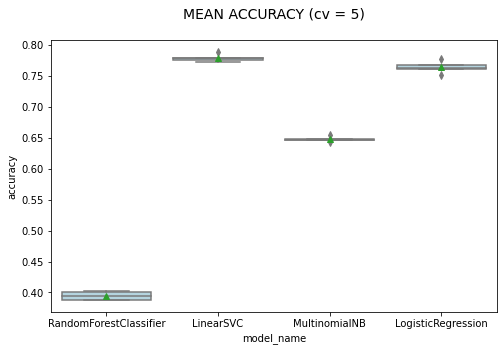

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

## Model Evaluation

In [39]:
x_train, x_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Precision, Recall, F1-score

In [48]:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [49]:
  # Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                Credit reporting, repair, or other       0.81      0.88      0.84       783
                                   Debt collection       0.76      0.80      0.78       588
                                     Consumer Loan       0.52      0.22      0.31        73
                       Credit card or prepaid card       0.73      0.82      0.77       253
                                          Mortgage       0.87      0.92      0.90       340
                             Vehicle loan or lease       0.43      0.14      0.21        43
                                      Student loan       0.85      0.85      0.85       155
         Payday loan, title loan, or personal loan       0.50      0.17      0.26        40
                       Checking or savings account       0.61      0.60      0.61        85
                           Bank account or service

### Confusion Matrix

In [53]:
 from sklearn.metrics import confusion_matrix

A Confusion Matrix is a table which rows represent the actual class and columns represents the predicted class.

If we had a perfect model that always classifies correctly a new complaint, then the confusion matrix would have values in the diagonal only (where predicted label = actual label).

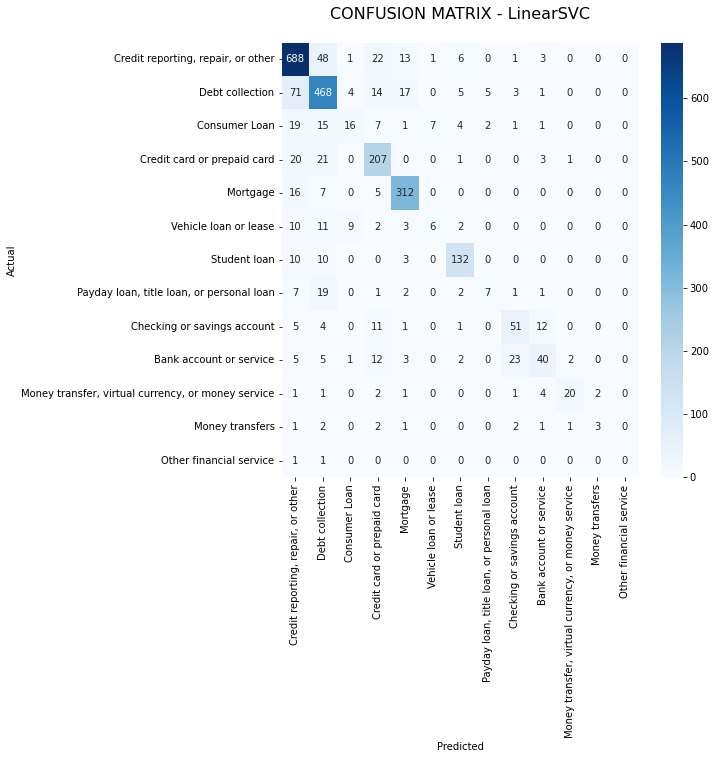

In [52]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);